# **Лабораторная работа №1**

Определить число кластеров.
Подобрать метод классификации, дающий наиболее ясные результаты.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Анализ данных Python/ЛР №1 (леденцы)/Леденцы.dat', delimiter=';')
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
5,5,4,5,5,3,3,3,3,3,3,3
6,5,5,4,5,3,3,3,3,3,3,3
7,5,4,5,5,3,3,3,3,3,3,3
8,5,5,5,5,3,3,3,3,3,3,3
9,5,4,5,4,3,3,3,3,3,3,3


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Получим историю объединения объектов в кластеры
link = linkage(data, method='ward', metric='euclidean')
link[:20]

array([[  0.,   4.,   0.,   2.],
       [  1.,   3.,   0.,   2.],
       [  2.,   6.,   0.,   2.],
       [  5., 339.,   0.,   3.],
       [ 32., 338.,   0.,   3.],
       [  7., 341.,   0.,   4.],
       [  8.,  30.,   0.,   2.],
       [ 12.,  15.,   0.,   2.],
       [ 16., 345.,   0.,   3.],
       [ 17., 346.,   0.,   4.],
       [ 18., 347.,   0.,   5.],
       [ 19., 348.,   0.,   6.],
       [ 20., 349.,   0.,   7.],
       [ 21., 350.,   0.,   8.],
       [ 23., 351.,   0.,   9.],
       [ 24., 352.,   0.,  10.],
       [ 25., 353.,   0.,  11.],
       [ 26., 354.,   0.,  12.],
       [ 42.,  43.,   0.,   2.],
       [ 44., 356.,   0.,   3.]])

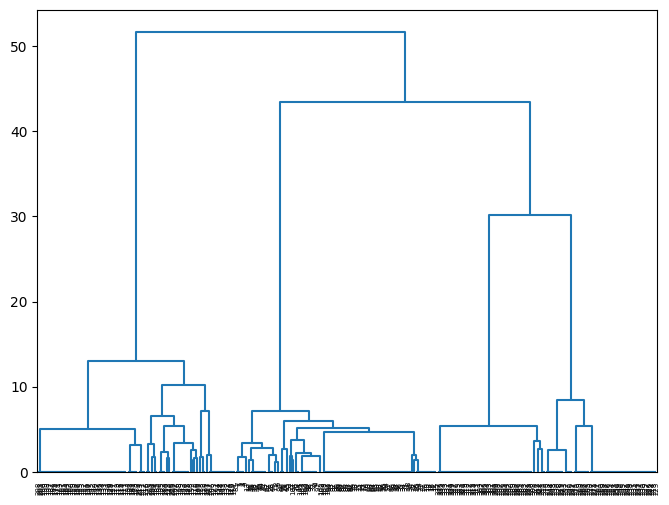

In [ ]:
fig = plt.figure(figsize=(8,6))
dend = dendrogram(link, color_threshold=-1, labels=data.index.tolist())

In [ ]:
# получим массив только с расстояниями для построения "каменистой осыпи"
distances = link[:,2]
distances

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Text(0, 0.5, 'Расстояние')

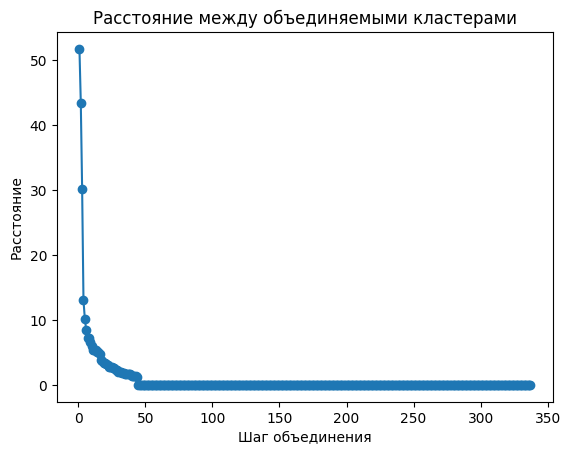

In [ ]:
# "каменистая осыпь"
dist_rev = distances[::-1]
idxs = range(1, len(distances) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Text(0, 0.5, 'Расстояние')

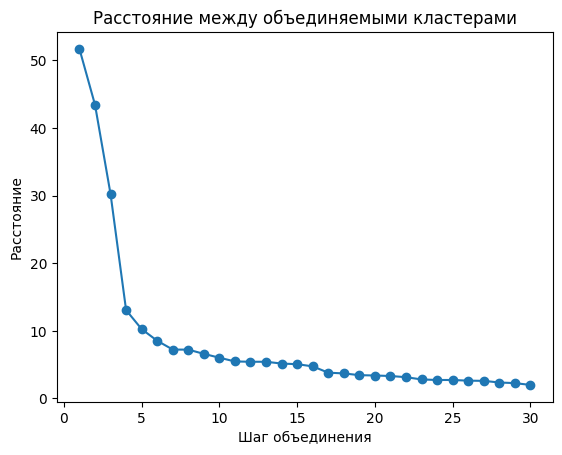

In [ ]:
# На первоначальном графике не ясно, на каком этапе расстояние пеерестает резко изменяться
# Уменьшим кол-во рассматриваемых итераций до 30
dist_rev = distances[::-1]
idxs = range(1, 30 + 1)
plt.plot(idxs, dist_rev[:len(idxs)], marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Text(0, 0.5, 'Расстояние')

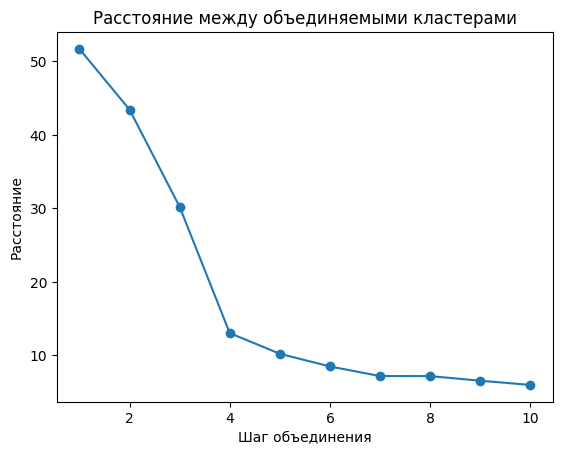

In [ ]:
# Промасштабируем график "каменистой осыпи" для наглядности
dist_rev = distances[::-1]
idxs = range(1, 10 + 1)
plt.plot(idxs, dist_rev[:len(idxs)], marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

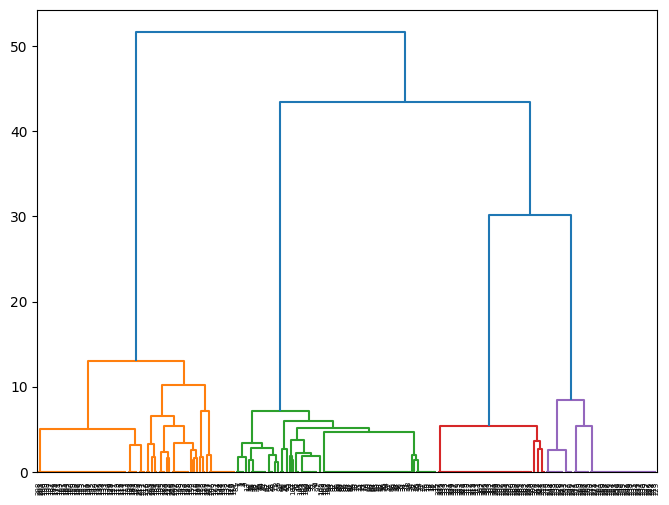

In [ ]:
# Таким образом, на 4 шаге расстояние между кластерами перестает сильно изменяться
# Принимаем число кластеров равным 4 (и смотрим, насколько хорошо выделяются кластеры из набора данных)
fig = plt.figure(figsize=(8,6))
dend_v2 = dendrogram(link,
                     color_threshold=dist_rev[2],
                     labels=data.index.tolist())

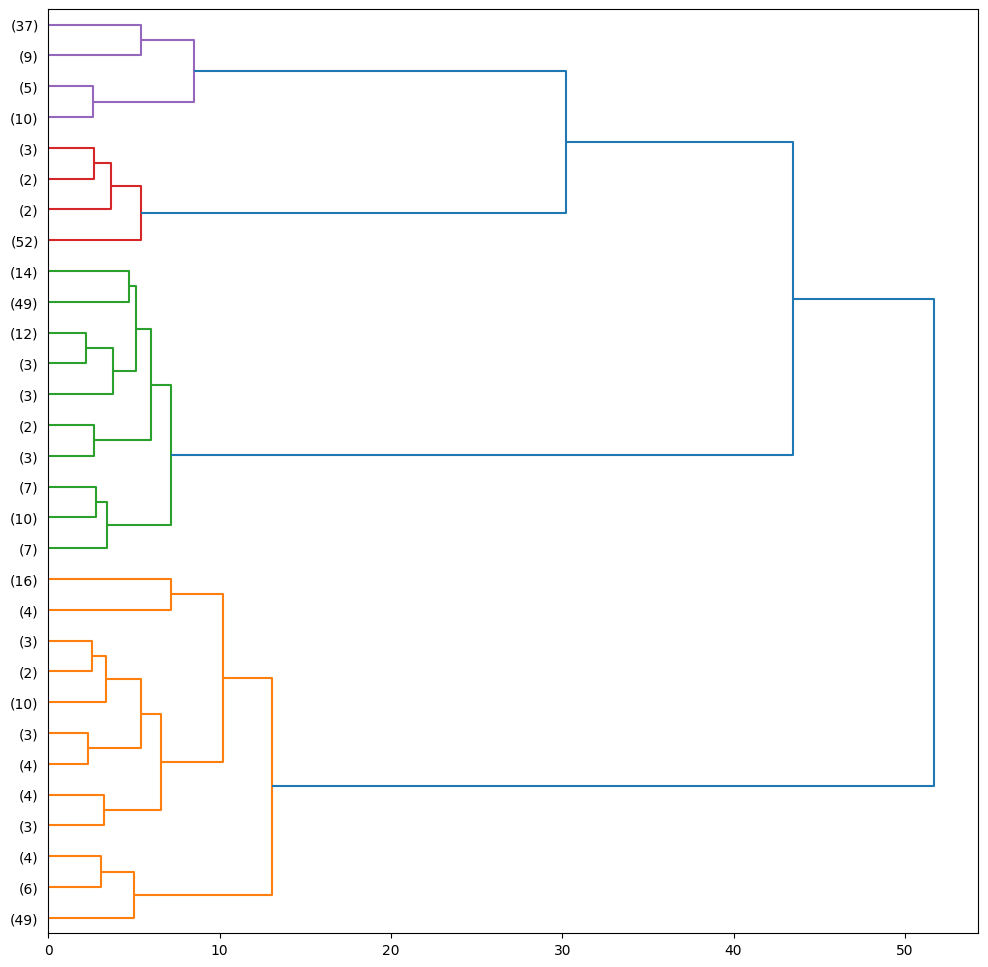

In [ ]:
# Посмотрим на отображение дендрограммы с учетом кол-ва наблюдений в каждой ветке дендрограммы
fig = plt.figure(figsize=(12,12))
dend_v2 = dendrogram(link,
                     color_threshold=dist_rev[2],
                     labels=data.index.tolist(),
                     truncate_mode='lastp',
                     orientation='right')

In [ ]:
# Посмотрим на количество объектов в каждом кластере
# А также попытаемся проинтерпретировать результаты
data['clusters'] = fcluster(link, dist_rev[3], criterion='distance')
data.groupby('clusters').size()
# data['cluster'].value_counts()

,0
clusters,
1,108
2,110
3,59
4,61


In [ ]:
data.groupby('clusters').mean()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
clusters,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия

Интерпретация:

1) в cluster(1) попали наблюдения, имеющие высокие показатели по пунктам V9, V10, V11

2) в cluster(2) попали наблюдения, имеющие высокие показатели по пунктам V1, V2, V3, V4

3) в cluster(3) попали наблюдения, имеющие высокие показатели по пунктам V7, V8

4) в cluster(4) попали наблюдения, имеющие высокие показатели по пунктам V5, V6

Таким образом, в 1-ую группу входят люди, которые потребляют леденцы при ухудшении физического самочувствия и поялвении боли в горле, заложенности носа и, возможно, других недугах. (108 объектов)

Во 2-ую группу входят люди, потребляющие леденцы для освежения дыхания. (110 объектов)

В 3-ью группу входит респонденты, потребляющие леденцы для концентрации, видимо, при решении важных задач, требущих сосредоточения. (59 объектов)

В 4-ую группу входят респонденты, которые потребляют леденцы как заменители сладкого. (61 объектов)

Так как в 1-ой и 2-ой группе наибольшее количество объектов, то компании следует сосредоточиться на этих двух целевых аудиториях.

# **Лабораторная работа №2**


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

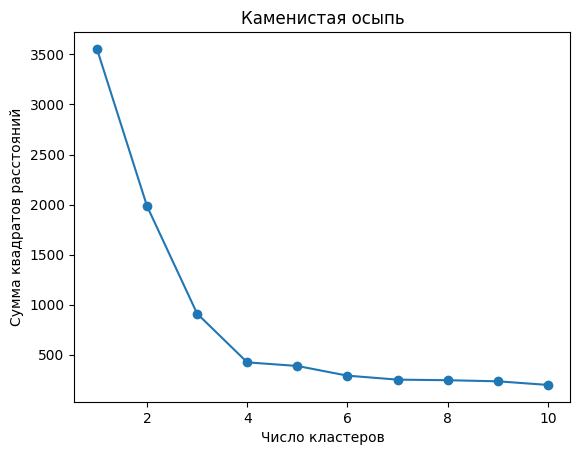

In [ ]:
K = range(1, 11)

# обучение модели при разном количестве заданных кластеров
models = [KMeans(n_clusters=k, random_state=42, max_iter=300).fit(data) for k in K]
dist = [model.inertia_ for model in models]

# каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

In [ ]:
# по графику выбираем число кластеров - 4
model_kmeans = models[3]
data['clusters_k-means'] = model_kmeans.labels_
data.groupby('clusters_k-means').size()

,0
clusters_k-means,
0,108
1,59
2,110
3,61


# **Лабораторная работа №3**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
# параметры модели заданы по умолчанию eps=0.5, min_samples=5, metric='euclidean'
dbscan = DBSCAN()
dbscan.fit(data)
clusters_db = pd.Series(dbscan.labels_).value_counts()
clusters_db.sort_index()

,count
-1,60
0,10
1,5
2,49
3,12
4,9
5,49
6,15
7,10
8,6


In [ ]:
def optimize_dbscan_silhouette(X, eps_range=None, min_samples_range=None,
                               metric='euclidean', verbose=True):
    # Если диапазоны eps и min_samples не заданы:
    if eps_range is None:
        eps_range = np.arange(start=0.75, stop=4, step=0.25)

    if min_samples_range is None:
        min_samples_range = np.arange(start=2, stop=11)

    # Список для сохранения результатов
    results = []

    # Перебор всех комбинаций параметров
    best_score = -1
    best_params = {}
    best_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            # Применяем DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            model_dbscan = dbscan.fit(X)
            labels = model_dbscan.labels_

            # Подсчет кластеров (без шума -1)
            not_noise_labels = np.unique(labels)
            n_clusters = len(not_noise_labels[not_noise_labels != -1])
            n_noise = np.sum(labels == -1)

            # Вычисляем silhouette score только если есть как минимум 2 кластера
            # и не все точки являются шумом
            if n_clusters >= 2 and n_noise < len(X) - 1:
                # Выбираем только точки, которые принадлежат кластерам (не шум)
                cluster_mark = labels != -1

                if np.sum(cluster_mark) >= 2:  # минимум 2 точки в кластерах
                    silhouette_avg = silhouette_score(X, labels)

                    # Сохраняем результат
                    result = {
                        'eps': eps,
                        'min_samples': min_samples,
                        'n_clusters': n_clusters,
                        'n_noise': n_noise,
                        'silhouette_score': silhouette_avg,
                        }
                    results.append(result)

                    # Обновляем лучший результат
                    if silhouette_avg > best_score and n_noise == 0:
                        best_score = silhouette_avg
                        best_params = {
                            'eps': eps,
                            'min_samples': min_samples,
                            'n_clusters': n_clusters,
                            'n_noise': n_noise
                            }
                        best_labels = labels.copy()
            else:
                # Если условия не выполнены, silhouette score не вычисляется
                result = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette_score': -2,  # специальное значение для невалидных случаев
                    }
                results.append(result)

        # DataFrame с результатами
        results_df = pd.DataFrame(results)

        # Валидные результаты, где silhouette_score > -1 и нет точек шума(выбросов)
        valid_results = results_df.loc[(results_df['silhouette_score'] > -1) & (results_df['n_noise'] == 0)]

    return best_params, best_score, valid_results, best_labels

In [ ]:
optimize_dbscan_silhouette(data)

({'eps': np.float64(2.75),
  'min_samples': np.int64(2),
  'n_clusters': 4,
  'n_noise': np.int64(0)},
 np.float64(0.753370659568534),
       eps  min_samples  n_clusters  n_noise  silhouette_score
 36   1.75            2           6        0          0.683770
 45   2.00            2           5        0          0.693580
 46   2.00            3           5        0          0.693580
 47   2.00            4           5        0          0.693580
 54   2.25            2           5        0          0.693580
 55   2.25            3           5        0          0.693580
 56   2.25            4           5        0          0.693580
 63   2.50            2           5        0          0.693580
 64   2.50            3           5        0          0.693580
 65   2.50            4           5        0          0.693580
 72   2.75            2           4        0          0.753371
 73   2.75            3           4        0          0.753371
 74   2.75            4           4        0  

In [ ]:
# Кластеризация на параметрах best_params
dbscan = DBSCAN(eps=2.75, min_samples=2, metric='euclidean')
model_dbscan = dbscan.fit(data)

In [ ]:
# Составление таблицы сопряженности
res_ = pd.DataFrame()

res_['cluster_hierarchy']  = fcluster(link, 4, criterion='maxclust')
res_['clusters_kmeans'] = model_kmeans.labels_
res_['model_dbscan'] = model_dbscan.labels_

In [ ]:
tab_1 = pd.crosstab(res_['cluster_hierarchy'], res_['clusters_kmeans'])
tab_2 = pd.crosstab(res_['cluster_hierarchy'], res_['model_dbscan'])
tab_3 = pd.crosstab(res_['model_dbscan'], res_['clusters_kmeans'])
print(tab_1, '\n', tab_2, '\n', tab_3)

clusters_kmeans      0   1    2   3
cluster_hierarchy                  
1                  108   0    0   0
2                    0   0  110   0
3                    0  59    0   0
4                    0   0    0  61 
 model_dbscan         0    1   2   3
cluster_hierarchy                  
1                    0  108   0   0
2                  110    0   0   0
3                    0    0   0  59
4                    0    0  61   0 
 clusters_kmeans    0   1    2   3
model_dbscan                     
0                  0   0  110   0
1                108   0    0   0
2                  0   0    0  61
3                  0  59    0   0
